<a href="https://colab.research.google.com/github/ersilia-os/event-fund-ai-drug-discovery/blob/main/notebooks/session2_breakout_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMV Malaria Dataset
We will use the list of 400 compounds from the MMV Malaria Box for this exercise. The list of molecules is already prepared in the /data folder of the google drive DataScience_Workshop we created during Session 1
First, we will mount Google Drive on the notebook to access the data.

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#import necessary packages
import matplotlib.pyplot as plt
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#do not run this if you already did during Session 1
!mkdir /content/drive/MyDrive/DataScience_Workshop
!git clone https://github.com/ersilia-os/event-fund-ai-drug-discovery.git /content/drive/MyDrive/DataScience_Workshop

Cloning into '/content/drive/MyDrive/DataScience_Workshop'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 143 (delta 64), reused 82 (delta 27), pack-reused 0
Receiving objects: 100% (143/143), 1.85 MiB | 7.45 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [5]:
#we can open it as a pandas dataframe
smiles = "drive/MyDrive/DataScience_Workshop/data/day2/mmv_malariabox.csv"
df=pd.read_csv(smiles)
df.head()

,CAN_SMILES
0,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O
1,CN(C)c1ccc(C(O)(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...
2,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...
3,CCOC(=O)C1=C(c2ccccc2)N=c2sc(=Cc3cc(C)n(-c4ccc...
4,CCOC(=O)c1cnc2c(C)cc(C)cc2c1Nc1ccc(OC)c(OC)c1


# Ersilia Model Hub
The Ersilia Model Hub is a repository of pre-trained, ready-to-use AI models for drug discovery. A list of models and its applications is available [here](https://ersilia.io/model-hub).

You can run the Ersilia Model Hub in your computer by installing the [Ersilia Python Package](https://github.com/ersilia-os/ersilia). In this session, we will use the Google Colab implementation of the Ersilia Model Hub to ensure compatibility with all systems.

In [6]:
#@title The Ersilia Model Hub
#@markdown Click on the play button to install Ersilia in this Colab notebook.

%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH={PYTHONPATH}:/usr/local/lib/python3.7/site-packages
%env CONDA_PREFIX=/usr/local
%env CONDA_PREFIX_1=/usr/local
%env CONDA_DIR=/usr/local
%env CONDA_DEFAULT_ENV=base
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys
_ = (sys.path.append("/usr/local/lib/python3.7/site-packages"))

# Example Model Prediction
We will use one model as a step-by-step guide of how to use the Ersilia Model Hub and analyse the results. Each Ersilia model is identified by a code (eosxxxx) and a slug (one - two word identifier). We will always refer to the models by either the code or the slug. More details are available in the Ersilia Model Hub [documentation](https://ersilia.gitbook.io/ersilia-book/).



## Antimalarial Activity
The Ersilia Model Hub contains a surrogate version of MAIP, a web-based model for predicting blood-stage malaria inhibitors, published in [Bosc et al, 2021](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-021-00487-2).

### Steps
1. Fetch the model from the online repositor using a bash command (!) 
2. Import the ersilia package as a Python function
3. Load the selected model, "eos2gth"
4. Run predictions for the input of interest (the MMV Malaria Box smiles list). The output will be loaded in a Pandas dataframe
5. Close the model

In [7]:
!ersilia fetch eos2gth

⬇️  Fetching model eos2gth: maip-malaria-surrogate
👍 Model eos2gth fetched successfully!


In [8]:
from ersilia import ErsiliaModel

model = ErsiliaModel("eos2gth")
model.serve()
output = model.predict(input=smiles, output="pandas")
model.close()

In [9]:
#once the model has run the predictions, let's save the output in our Google Drive
output.to_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos2gth.csv", index=False)

### Analyising the model output

In [10]:
#First, let's load the predictions we just stored in drive

maip = pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos2gth.csv")
maip.head()

,key,input,score
0,ALGPHOUNWIZIOQ-UHFFFAOYSA-N,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O,6.886159
1,QFVDKARCPMTZCS-UHFFFAOYSA-N,CN(C)c1ccc(C(O)(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...,15.483176
2,HKNNPGWJKJDXCN-UHFFFAOYSA-N,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,27.288107
3,QQNUVMRXVVLAAU-UHFFFAOYSA-N,CCOC(=O)C1=C(c2ccccc2)N=c2sc(=Cc3cc(C)n(-c4ccc...,12.532308
4,MSGARPVVCYTSLR-UHFFFAOYSA-N,CCOC(=O)c1cnc2c(C)cc(C)cc2c1Nc1ccc(OC)c(OC)c1,37.554440


We observe three columns:

*   key: InChiKey representation of the molecules
*   input: SMILES
*   score: model prediction

We can read more about the output of the model in its associated [documentation](https://chembl.gitbook.io/malaria-project/output-file). As we can see, the output is a score, and "The higher the score is the more likely the compound is predicted to be active. Because there is no normalised score, the user defines a selection threshold."



In [ ]:
#we can sort the molecules based on its score
output.sort_values("score", ascending=False).head()

,key,input,score
136,HPFVQAYLQOSFOL-UHFFFAOYSA-N,COc1cccc(Nc2nc(NCCO)c3ccccc3n2)c1,77.199020
399,ZGMMVVYGDFQTBB-UHFFFAOYSA-N,OCCNc1nc(Nc2ccc(Cl)c(Cl)c2)nc2ccccc12,76.798370
69,RHZLKBRFIAZMTN-UHFFFAOYSA-N,Cc1ccc(Nc2nc(NCCO)c3ccccc3n2)cc1C,76.052498
339,NPWXHTXMBIOHKI-UHFFFAOYSA-N,Cn1c(=O)n(C)c2cc(CNCCNc3ccnc4cc(Cl)ccc34)ccc21,76.012589
55,YZZGEZJZTYYZGG-UHFFFAOYSA-N,CCN(CC)CCNc1ncnc2c1[nH]c1ccc(Cl)cc12,71.951157


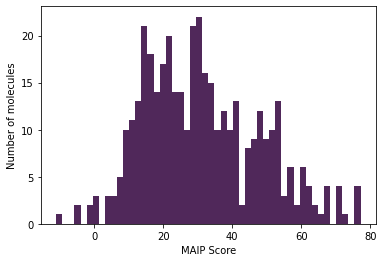

In [ ]:
#we can plot the distribution of the scores

plt.hist(output["score"], bins=50, color="#50285a")
plt.xlabel("MAIP Score")
plt.ylabel("Number of molecules")
plt.show()

# Breakout session
Here is a list of models that can be used for this exercise. Please refer to the [Ersilia Model Hub](https://www.ersilia.io/model-hub) to read more about each one of them, the source of data they use and how can them be applied to our problem.

*   Malaria Activity: eos2gth / maip-malaria-surrogate
*   Tuberculosis Activity: eos46ev / chemtb
*   Antibiotic Activity: eos4e40 / chemprop-antibiotic
*   Cardiotoxicity (hERG): eos43at / molgrad-herg
*   Retrosynthetic Accessibility: eos2r5a / retrosynthetic-accessibility
*   Aqueous Solubility: eos6oli / soltrannet-aqueous-solubility
*   Natural Product Likeness: eos9yui / natural-product-likeness

In [11]:
!ersilia fetch eos46ev
!ersilia fetch eos4e40
!ersilia fetch eos43at
!ersilia fetch eos2r5a
!ersilia fetch eos6oli
!ersilia fetch eos9yui

⬇️  Fetching model eos46ev: chemtb
👍 Model eos46ev fetched successfully!
⬇️  Fetching model eos4e40: chemprop-antibiotic
👍 Model eos4e40 fetched successfully!
⬇️  Fetching model eos43at: molgrad-herg
👍 Model eos43at fetched successfully!
⬇️  Fetching model eos2r5a: retrosynthetic-accessibility
👍 Model eos2r5a fetched successfully!
⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
👍 Model eos6oli fetched successfully!
⬇️  Fetching model eos9yui: natural-product-likeness
👍 Model eos9yui fetched successfully!


In [12]:
models = ["eos46ev", "eos4e40", "eos43at", "eos2r5a", "eos6oli", "eos9yui"]

In [14]:
for m in models:
    model = ErsiliaModel(m)
    model.serve()
    output = model.predict(input=smiles, output="pandas")
    model.close()
    output.to_csv("drive/MyDrive/DataScience_Workshop/data/day2/{}.csv".format(m), index=False)

# Results Analysis
We have run predictions for all models from the list. In this example solution, we will merge all results in a single file and rank molecules according to our interests. There is more than one possible result, the goal is to practice correlating different model results and understanding their use.
First, let's understand the output of each model:

### ChemTb
Source Publication: [Ye et al, 2021](https://academic.oup.com/bib/article-abstract/22/5/bbab068/6209685)

Type of model: Classification

Output: Probability of activity against *M.tuberculosis*

In [15]:
#we load the model results from the drive
chemtb = pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos46ev.csv")
chemtb.head()

,key,input,probability
0,ALGPHOUNWIZIOQ-UHFFFAOYSA-N,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O,0.139140
1,QFVDKARCPMTZCS-UHFFFAOYSA-N,CN(C)c1ccc(C(O)(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...,0.097058
2,HKNNPGWJKJDXCN-UHFFFAOYSA-N,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,0.368746
3,QQNUVMRXVVLAAU-UHFFFAOYSA-N,CCOC(=O)C1=C(c2ccccc2)N=c2sc(=Cc3cc(C)n(-c4ccc...,0.318272
4,MSGARPVVCYTSLR-UHFFFAOYSA-N,CCOC(=O)c1cnc2c(C)cc(C)cc2c1Nc1ccc(OC)c(OC)c1,0.110285


In [16]:
#we can check the maximum and minimum values
print(chemtb["probability"].max())
print(chemtb["probability"].min())

0.6524488
0.058787655


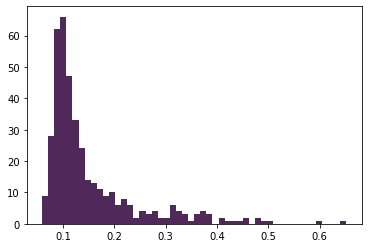

In [17]:
plt.hist(chemtb["probability"], bins=50, color="#50285a")
plt.show()

*Comments: we can observe a very low probability of activity against M.tuberculosis, as expected since this is a list optimized for malaria activity. We will not take into account this score for the molecular prioritization.*

### Antibiotic Activity
Source Publication: [Stokes et al, 2021](https://pubmed.ncbi.nlm.nih.gov/32084340/)

Type of model: Classification

Output: probability that a molecule inhibits *E.coli* growth (the original training set had a cut-off of 80% inhibition)

In [18]:
#we load the model results from the drive
antib = pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos4e40.csv")
antib.head()

,key,input,50uM_Inhibition
0,ALGPHOUNWIZIOQ-UHFFFAOYSA-N,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O,0.005417
1,QFVDKARCPMTZCS-UHFFFAOYSA-N,CN(C)c1ccc(C(O)(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...,0.005198
2,HKNNPGWJKJDXCN-UHFFFAOYSA-N,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,0.031129
3,QQNUVMRXVVLAAU-UHFFFAOYSA-N,CCOC(=O)C1=C(c2ccccc2)N=c2sc(=Cc3cc(C)n(-c4ccc...,0.043659
4,MSGARPVVCYTSLR-UHFFFAOYSA-N,CCOC(=O)c1cnc2c(C)cc(C)cc2c1Nc1ccc(OC)c(OC)c1,0.012493


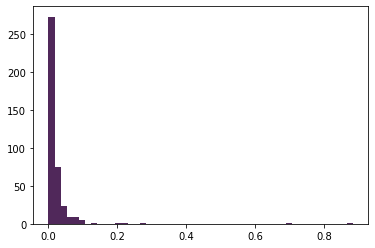

In [19]:
plt.hist(antib["50uM_Inhibition"], bins=50, color="#50285a")
plt.show()

In [20]:
#we can check the maximum and minimum values
print(antib["50uM_Inhibition"].max())
print(antib["50uM_Inhibition"].min())

0.88425463
0.00043740415


*Again, most of the MMV Malaria Box molecules do not display high predicted activity against other pathogens, expected in a curated dataset.*

### Cardiotoxicity
Source Publication: [Jiménez-Luna et al, 2021](https://pubs.acs.org/doi/10.1021/acs.jcim.0c01344)

Type of model: Regression

Output: pIC50 (negative log of the IC50 value when converted to molar). For example IC50 = 1 uM is a pIC50 = 6

In [21]:
herg = pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos43at.csv")
herg.head()

,key,input,pic50
0,ALGPHOUNWIZIOQ-UHFFFAOYSA-N,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O,5.859726
1,QFVDKARCPMTZCS-UHFFFAOYSA-N,CN(C)c1ccc(C(O)(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...,5.997639
2,HKNNPGWJKJDXCN-UHFFFAOYSA-N,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,5.876915
3,QQNUVMRXVVLAAU-UHFFFAOYSA-N,CCOC(=O)C1=C(c2ccccc2)N=c2sc(=Cc3cc(C)n(-c4ccc...,5.637402
4,MSGARPVVCYTSLR-UHFFFAOYSA-N,CCOC(=O)c1cnc2c(C)cc(C)cc2c1Nc1ccc(OC)c(OC)c1,6.062968


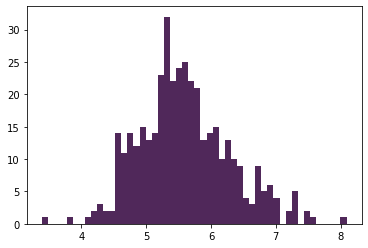

In [22]:
plt.hist(herg["pic50"], bins=50, color="#50285a")
plt.show()

In [23]:
#we can check the maximum and minimum values
print(herg["pic50"].max())
print(herg["pic50"].min())

8.091017
3.3958933


*The outcome is the pIC50 (negative log of the IC50 value when molar). We can select a threshold in uM and convert it to pIC50 to discard molecules with potential cardiotoxic activity.*

### Retrosynthetic Accessibility
Source Publication: [Thakkar et al, 2021](https://pubs.rsc.org/en/content/articlelanding/2021/sc/d0sc05401a)

Type of model: Regression

Output: highest score indicates easier retrosynthetic route

In [24]:
ra = pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos2r5a.csv")
ra.head()

,key,input,ra_score
0,ALGPHOUNWIZIOQ-UHFFFAOYSA-N,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O,0.992027
1,QFVDKARCPMTZCS-UHFFFAOYSA-N,CN(C)c1ccc(C(O)(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...,0.985761
2,HKNNPGWJKJDXCN-UHFFFAOYSA-N,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,0.990044
3,QQNUVMRXVVLAAU-UHFFFAOYSA-N,CCOC(=O)C1=C(c2ccccc2)N=c2sc(=Cc3cc(C)n(-c4ccc...,0.014052
4,MSGARPVVCYTSLR-UHFFFAOYSA-N,CCOC(=O)c1cnc2c(C)cc(C)cc2c1Nc1ccc(OC)c(OC)c1,0.762822


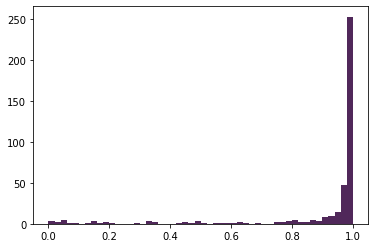

In [25]:
plt.hist(ra["ra_score"], bins=50, color="#50285a")
plt.show()

In [26]:
#we can check the maximum and minimum values
print(ra["ra_score"].max())
print(ra["ra_score"].min())

0.9992656
0.0016327174


*hints: we observe good RA score for most molecules, since these are selected candidates it is likely that we find good availabilities. We can discard the ones with very low predicted values*

### Solubility
Source Publication: [Francoeur et al, 2021](https://pubs.acs.org/doi/10.1021/acs.jcim.1c00331)

Type of model: Regression

Output: Prediction of the LogS (logarithm of the solubility in mol/L)

In [27]:
sol = pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos6oli.csv")
sol.head()

,key,input,solubility
0,ALGPHOUNWIZIOQ-UHFFFAOYSA-N,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O,-4.767
1,QFVDKARCPMTZCS-UHFFFAOYSA-N,CN(C)c1ccc(C(O)(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...,-3.565
2,HKNNPGWJKJDXCN-UHFFFAOYSA-N,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,-8.075
3,QQNUVMRXVVLAAU-UHFFFAOYSA-N,CCOC(=O)C1=C(c2ccccc2)N=c2sc(=Cc3cc(C)n(-c4ccc...,-8.536
4,MSGARPVVCYTSLR-UHFFFAOYSA-N,CCOC(=O)c1cnc2c(C)cc(C)cc2c1Nc1ccc(OC)c(OC)c1,-6.299


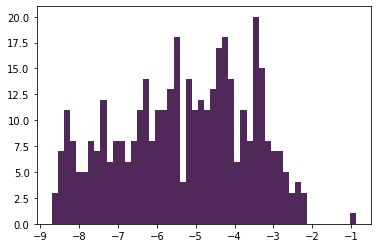

In [28]:
plt.hist(sol["solubility"], bins=50, color="#50285a")
plt.show()

In [29]:
#we can check the maximum and minimum values
print(sol["solubility"].max())
print(sol["solubility"].min())

-0.871
-8.701


*LogS is the log of the solubility (mol/L) at neutral pH. If we look at the publication, the authors set a threshold of LogS > -4 to classify a molecule as soluble. We can use the same to select the highest soluble molecules*

### Natural Product Likeness
Source Publication: [Francoeur et al, 2021](https://pubs.acs.org/doi/10.1021/acs.jcim.1c00331)

Type of model: Regression

Output: score indicating similarity to natural products (higher score indicates higher natural product likeness)

In [31]:
np = pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos9yui.csv")
np.head()

,key,input,score
0,ALGPHOUNWIZIOQ-UHFFFAOYSA-N,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O,-9.805668
1,QFVDKARCPMTZCS-UHFFFAOYSA-N,CN(C)c1ccc(C(O)(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...,-8.529993
2,HKNNPGWJKJDXCN-UHFFFAOYSA-N,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,-6.630119
3,QQNUVMRXVVLAAU-UHFFFAOYSA-N,CCOC(=O)C1=C(c2ccccc2)N=c2sc(=Cc3cc(C)n(-c4ccc...,-9.085316
4,MSGARPVVCYTSLR-UHFFFAOYSA-N,CCOC(=O)c1cnc2c(C)cc(C)cc2c1Nc1ccc(OC)c(OC)c1,-7.305698


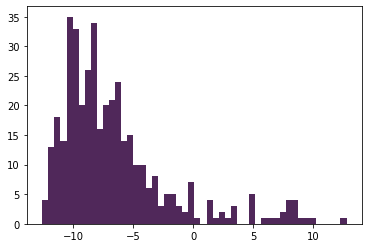

In [32]:
plt.hist(np["score"], bins=50, color="#50285a")
plt.show()

In [33]:
#we can check the maximum and minimum values
print(np["score"].max())
print(np["score"].min())

12.814294
-12.594992


*we can see how the NP-likeness is low for most molecules, we can even use a fully NP dataset to check which values we obtain. NP score can be useful when looking, for example for new scaffolds.*

#### Bringing together all predictions
One way to select molecules is to create a table with all predictions and select the molecules that fulfill the desired conditions

In [34]:
#we load all results into a dictionary
results = {"maip": pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos2gth.csv"), 
           "chemtb": pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos46ev.csv"), 
           "antib": pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos4e40.csv"),
           "herg": pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos43at.csv"), 
           "ra": pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos2r5a.csv"), 
           "sol": pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos6oli.csv"), 
           "np": pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos9yui.csv")
           }

In [35]:
#we now append the predictions to the InChiKey and SMILES
#the molecule order is maintained in the different models

df = results["maip"][results["maip"].columns[:2]] #this creates a dataframe with inchi and smiles only (cols 0 and 1)

for k,v in results.items():
    output = v[v.columns[2]]
    df["{}".format(k)]=output

df.to_csv("drive/MyDrive/DataScience_Workshop/data/day2/allpreds.csv")

In [36]:
#molecules where malaria activity prediction is above 30
df = df[df["maip"]>30]
df.shape

(189, 9)

In [37]:
#molecules where ra score is 0.75 or above
df = df[df["ra"]>=0.75]
df.shape

(177, 9)

In [38]:
#molecules where solubility is -4 or above
df = df[df["sol"]>-4]
df.shape

(49, 9)

In [39]:
#molecules where hERG IC50 is more than 10 uM (pIC50=6)
df = df[df["herg"]<6]
df.shape

(33, 9)

With the selected cut-offs, we have obtained 33 molecules, which we can further refine based on our preferences for:
*  Activity against other pathogens
*  Similarity to Natural Products

We can visualise the activities of the selected molecules in the rest of the assays to guide us in making a decision

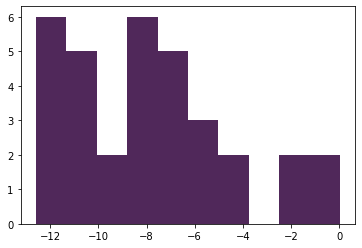

In [41]:
plt.hist(df["np"], color="#50285a")
plt.show()

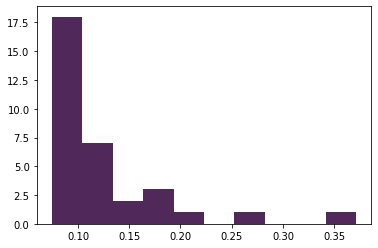

In [42]:
plt.hist(df["chemtb"], color="#50285a")
plt.show()

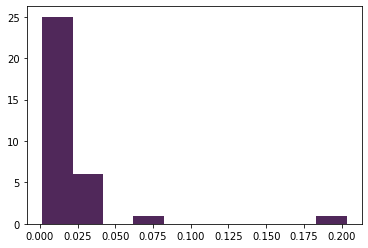

In [43]:
plt.hist(df["antib"], color="#50285a")
plt.show()

We don't see an interesting distribution of the selected molecules in these assays, so we can simply rank the 33 by malaria activity and select the 10 highest for this example

In [44]:
df.sort_values(by="maip", ascending=False, inplace=True)
df

,key,input,maip,chemtb,antib,herg,ra,sol,np
136,HPFVQAYLQOSFOL-UHFFFAOYSA-N,COc1cccc(Nc2nc(NCCO)c3ccccc3n2)c1,77.199020,0.096129,0.005617,5.501676,0.987168,-3.457,-9.260608
69,RHZLKBRFIAZMTN-UHFFFAOYSA-N,Cc1ccc(Nc2nc(NCCO)c3ccccc3n2)cc1C,76.052500,0.088322,0.006066,5.449112,0.988130,-3.743,-7.866877
28,DSQFFQFYQVGMPS-UHFFFAOYSA-N,CNCCCNc1ccnc2cc(Cl)ccc12,71.683020,0.087292,0.025201,4.933387,0.995203,-2.180,-4.078742
173,ULJISGNQAXNPOC-UHFFFAOYSA-N,Clc1ccc2[nH]c3c(NCCCN4CCOCC4)ncnc3c2c1,68.270740,0.117942,0.004766,5.592291,0.989207,-3.008,-7.842378
353,VTHMRLOUPKJVSL-UHFFFAOYSA-N,CN1CCN(c2nc(Nc3ccc(O)cc3)nc3ccccc23)CC1,67.532530,0.082182,0.018570,5.683293,0.991483,-3.408,-10.478223
45,OJGAAQMNLKYWSQ-UHFFFAOYSA-N,CCN(CC)CCNc1ccnc2cc(Cl)ccc12,66.729360,0.085380,0.003050,4.903500,0.995497,-2.739,-0.870375
16,YUNBRHOGRKHXNG-UHFFFAOYSA-N,Fc1ccc2[nH]c3c(NCCCN4CCOCC4)ncnc3c2c1,64.947160,0.148015,0.006703,5.456995,0.988431,-2.814,-11.087439
223,QWAVSGXBYFASKZ-UHFFFAOYSA-N,CN(C)CCNc1cc(-c2ccccc2)nc2ccccc12,55.696774,0.110157,0.034502,5.456350,0.994855,-3.473,-5.867619
232,YVFMXQOVHCJUFX-UHFFFAOYSA-N,CN1CCN(c2ncnc3c2[nH]c2ccc(Cl)cc23)CC1,54.192310,0.074371,0.035833,5.215706,0.990962,-2.866,-8.694688
177,VFFXYVJKHGENTG-UHFFFAOYSA-N,Clc1cc(Br)ccc1-c1ccc(CNCC2CCNCC2)o1,48.810190,0.146462,0.015274,5.630806,0.994923,-3.047,-11.417738


In [45]:
%%capture
!pip install rdkit

from rdkit import Chem
from rdkit.Chem import Draw

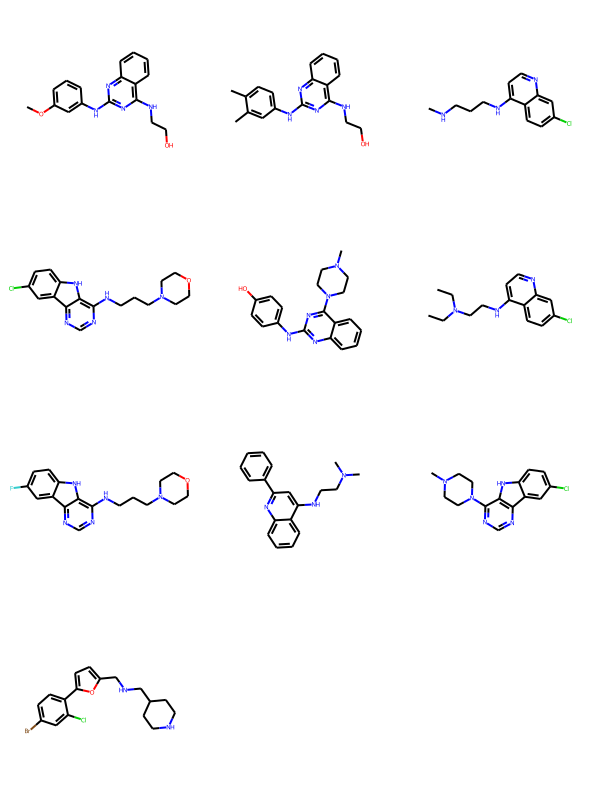

In [46]:
smiles=df["input"][:10]
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(mols)